# Importing all libraries and installing Pyavrophonetic

In [ ]:
! sudo pip install PyAvroPhonetic

     |████████████████████████████████| 133kB 10.2MB/s 
  Created wheel for PyAvroPhonetic: filename=PyAvroPhonetic-0.1.3-cp36-none-any.whl size=18734 sha256=88881a70e49bf5574539dbed195ec6c5928bd3b7cd6d0a03c27f79ba661086d6
  Stored in directory: /root/.cache/pip/wheels/8c/8c/36/9c55da15e82164f005d8a1091fa66bccc5865a01e7fabf7f34
Successfully built PyAvroPhonetic


In [ ]:
from pyavrophonetic import avro
avro.parse('aami banglay gaan gai')

'আআমি বাংলায় গাআন গাই'

In [ ]:
import re

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from textblob import TextBlob

from nltk import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation , Embedding, GlobalMaxPooling1D, Bidirectional

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14619421690688230008
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6024982419000646939
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15075379842661070375
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11146783616
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10620276953937102995
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [ ]:
b = TextBlob(avro.parse('aami banglay gaan gai'))
c = str(b.translate(to='en'))
print(c)

I sing in Bengali


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
main_directory = '/content/drive/My Drive/My Works/Bangla YouTube/Emotion.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dataset = pd.read_csv(main_directory,encoding = 'utf-8',sep=';')
dataset.head()

,id,text,emotion,lan,domain
0,2275,Hands down. You are good. I mean smart good.,joy,EN,funny_video
1,2283,Your are very good. keep it up,none,EN,funny_video
2,2292,Man!! I will never get used to these videos of...,surprise,EN,funny_video
3,2293,ডিসলাইক দেয়া 32,none,BN,funny_video
4,2298,ব্যাপক বিনোদন।,joy,BN,funny_video


In [ ]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,id,text,emotion,lan,domain
0,10925,ato sundor akta talk show apnader uchit cilo a...,anger,RN,talkshow_video
1,14892,"ছাত্রলীগ একটি সন্ত্রাসী সংগঠন,এটাকে নিষিদ্ধ কর...",disgust,BN,news_video
2,20589,লুচ্চা\n,disgust,BN,funny_video
3,23535,এই গাধার বাচ্চা তোর পরিচয় অার বংশ পরিচয় নিয়া স...,anger,BN,report_video
4,7155,+Sadia Sharmeen wow :')\n,joy,RN,music_video


In [ ]:
# Get indexes where name column has value john
indexNames = dataset[(dataset['lan'] == 'EN') | (dataset['lan'] == 'BN')].index

# Delete these row indexes from dataFrame
dataset = dataset.drop(indexNames)

In [ ]:

dataset.head()

,id,text,emotion,lan,domain
0,10925,ato sundor akta talk show apnader uchit cilo a...,anger,RN,talkshow_video
4,7155,+Sadia Sharmeen wow :')\n,joy,RN,music_video
6,20236,Sarwara Mahabub K cheater sabai jane……cheap te...,disgust,RN,sports_video
7,15639,অসাধারণ 👌👌👌 love you nishu and tisha 💜💜💜\n,joy,RN,drama_video
8,12756,tusar vai ekhon review kore na kno?\n,surprise,RN,review_video


In [ ]:
emotion = np.array(dataset['emotion'])

In [ ]:
class_values = dataset['emotion'].unique()
print(class_values)

['anger' 'joy' 'disgust' 'surprise' 'sad' 'none' 'fear' 'others']


In [ ]:
dataset.groupby('emotion')['text'].count()

emotion
anger       116
disgust     225
fear          5
joy         349
none        315
others        2
sad          72
surprise     53
Name: text, dtype: int64

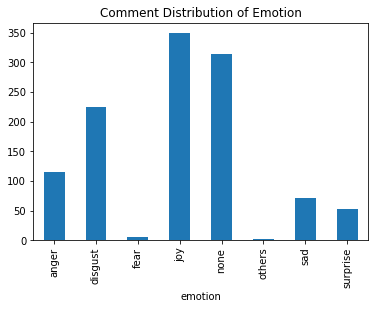

In [ ]:
dataset.groupby('emotion')['text'].count().plot(kind='bar' , title= 'Comment Distribution of Emotion')

In [ ]:
def plot_model(history):
    # Plot training & validation accuracy values
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy',linewidth=3.0)
    plt.plot(x, val_acc, 'r', label='Validation accuracy',linewidth=3.0)
    plt.title('Training and validation accuracy',fontsize=18)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss',linewidth=3.0)
    plt.plot(x, val_loss, 'r', label='Validation loss',linewidth=3.0)
    plt.title('Training and validation loss', fontsize=18)
    plt.legend()


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from textblob import TextBlob
def convert_to_bangla_to_eng(text):
  convert_to_bangla = []
  text = str(TextBlob(avro.parse(dataset['text'])))
  #eng = str(text.translate(to='en'))
  convert_to_bangla.append(text)
  return convert_to_bangla

In [ ]:
row_count = sum(1 for row in dataset)
for i in range (row_count):
  dataset['text'][i] = str(TextBlob(avro.parse(dataset['text'][i])))
  
#dataset['text'] = dataset['text'].map(lambda x: convert_to_bangla_to_eng(x))
dataset.head()

,id,text,emotion,lan,domain
0,26444,র৮ ভাল লাগসে\nআআআআহ থসে ল্যরিচস 👌💜💜💜\nদন'ত বুয়...,none,RN,talkshow_video
5,7109,aaaah those lyrics 👌💜💜💜\n,joy,RN,music_video
8,8135,Don't buy this phone 📱 iPhone X. Ai phone ta u...,disgust,RN,review_video
9,26163,thank you liTon Gaji vaiya\n,joy,RN,talkshow_video
10,13699,tusar vai mal khaise nki pura di kothay matlam...,disgust,RN,review_video


In [ ]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(emotion)

print(label_encoder.classes_)

label_OneHotEncoder = OneHotEncoder()
encoded_label = label_OneHotEncoder.fit_transform(encoded_label.reshape(-1,1)).toarray()

['anger' 'disgust' 'fear' 'joy' 'none' 'others' 'sad' 'surprise']


In [ ]:
vocabulary_size = 10000
input_length = 30

In [ ]:
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(dataset['text'])
sequences = tokenizer.texts_to_sequences(dataset['text'])
data = pad_sequences(sequences, maxlen = input_length)

In [ ]:
 encoded_label.shape
 data.shape
 data.reshape(-1,1)

array([[   1],
       [3841],
       [ 249],
       ...,
       [ 832],
       [1109],
       [ 815]], dtype=int32)

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(data, encoded_label, test_size = 0.2)

In [ ]:
num_classes = len(class_values)
validation_split = 0.1

In [ ]:
output_dim = 100
dense_input = 1000

l1_dropout = 0.2
l1_recurrent_dropout = 0.2

l2_dropout = 0.2
l2_recurrent_dropout = 0.2

l1_lstm_units = 128
l2_lstm_units = 64

validation_split = 0.2
epochs = 100

callback_patience = 2

In [ ]:
callback = [EarlyStopping(monitor='val_loss', patience = callback_patience)]

In [ ]:
glove_dir =  '/content/drive/My Drive/Thesis/Thesis Codes 4_2/Dataset/bn_glove.100d.txt'

In [ ]:
embeddings_index = dict()
f = open(glove_dir, encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
embedding_matrix = np.zeros((vocabulary_size, output_dim))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
output_dim = 100
dense_input = 1000

dropout = 0.3

conv1D_filters = 100
conv1D_kernel_size = 4

pool_size = 5

l1_dropout = 0.2
l1_recurrent_dropout = 0.2

l2_dropout = 0.2
l2_recurrent_dropout = 0.2

l1_lstm_units = 64
l2_lstm_units = 32

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, output_dim, input_length = input_length, 
                          weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(dropout))

model_glove.add(Dense(output_dim, activation='tanh'))

model_glove.add(Conv1D(filters = conv1D_filters, kernel_size = conv1D_kernel_size, 
                       activation='tanh'))
model_glove.add(MaxPooling1D(pool_size = pool_size))

model_glove.add(LSTM(l1_lstm_units , dropout = l1_dropout,
                     return_sequences=True, activation='tanh'))
model_glove.add(LSTM(l2_lstm_units , dropout = l2_dropout,
                     return_sequences=False , activation='tanh'))

model_glove.add(Dense(8, activation='softmax'))

model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
model_glove.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1000000   
_________________________________________________________________
dropout (Dropout)            (None, 30, 100)           0         
_________________________________________________________________
dense (Dense)                (None, 30, 100)           10100     
_________________________________________________________________
conv1d (Conv1D)              (None, 27, 100)           40100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 100)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 5, 64)             42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                1

Epoch 1/100
23/23 [==============================] - 1s 60ms/step - loss: 0.3592 - accuracy: 0.2930 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3223 - val_accuracy: 0.3736 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 0.3168 - accuracy: 0.3191 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.3064 - val_accuracy: 0.3516 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 0s 13ms/step - loss: 0.3083 - accuracy: 0.3356 - f1_m: 0.0026 - precision_m: 0.0435 - recall_m: 0.0014 - val_loss: 0.3045 - val_accuracy: 0.3681 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.3054 - accuracy: 0.3755 - f1_m: 0.0000e+00 - precision_m: 0.0000e+

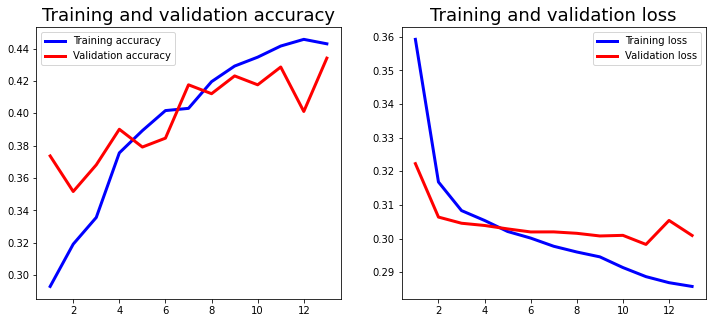

In [ ]:
history = model_glove.fit(train_data, train_label, validation_split = validation_split, epochs = epochs, 
                          shuffle = True, callbacks = callback)

plot_model(history)

In [ ]:
model_glove.save('/content/drive/My Drive/My Works/Bangla YouTube/model_stacked_lstm_cnn_pretrained_banglish.h5')

In [ ]:
model_glove.evaluate(test_data, test_label, verbose = 1)

8/8 [==============================] - 0s 7ms/step - loss: 0.3160 - accuracy: 0.3640 - f1_m: 0.0267 - precision_m: 0.0938 - recall_m: 0.0156


[0.3160196542739868,
 0.36403509974479675,
 0.02668127976357937,
 0.09375,
 0.015625]

In [ ]:
test_text = 'ahare'
test_text = pd.Series(test_text)

sequences = tokenizer.texts_to_sequences(test_text)
data = pad_sequences(sequences, maxlen = input_length)

In [ ]:
label_encoder.classes_[np.argmax(model_glove.predict(data))]

'joy'

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, output_dim, input_length = input_length, 
                          weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(dropout))

model_glove.add(Dense(output_dim, activation='relu'))

model_glove.add(Conv1D(filters = conv1D_filters, kernel_size = conv1D_kernel_size, 
                       activation='relu'))
model_glove.add(MaxPooling1D(pool_size = pool_size))

model_glove.add(LSTM(l1_lstm_units , dropout = l1_dropout,
                     return_sequences=True, activation='relu'))
model_glove.add(LSTM(l2_lstm_units , dropout = l2_dropout,
                     return_sequences=False , activation='relu'))

model_glove.add(Dense(8, activation='softmax'))

model_glove.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [ ]:
model_glove.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 30, 100)           10100     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 100)           40100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 64)             42240     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)               

Epoch 1/100
23/23 [==============================] - 1s 63ms/step - loss: 0.3704 - accuracy: 0.2531 - f1_m: 0.0036 - precision_m: 0.0435 - recall_m: 0.0019 - val_loss: 0.3551 - val_accuracy: 0.3132 - val_f1_m: 0.0101 - val_precision_m: 0.1667 - val_recall_m: 0.0052
Epoch 2/100
23/23 [==============================] - 1s 40ms/step - loss: 0.3448 - accuracy: 0.3012 - f1_m: 0.0129 - precision_m: 0.1522 - recall_m: 0.0068 - val_loss: 0.3246 - val_accuracy: 0.2857 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 1s 39ms/step - loss: 0.3211 - accuracy: 0.2806 - f1_m: 0.0153 - precision_m: 0.1754 - recall_m: 0.0082 - val_loss: 0.3072 - val_accuracy: 0.2967 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 1s 37ms/step - loss: 0.3109 - accuracy: 0.2930 - f1_m: 0.0078 - precision_m: 0.0870 - recall_m: 0.0041 - val_loss: 0.3010 - v

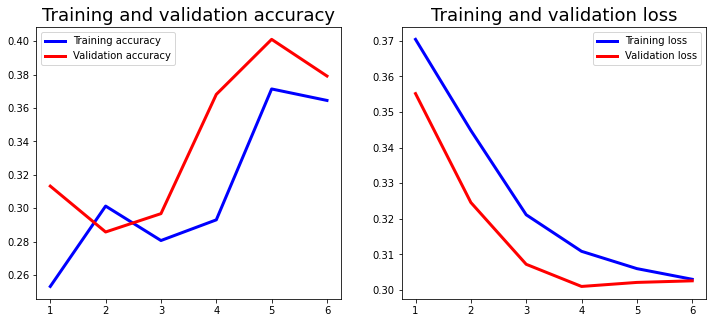

In [ ]:
history = model_glove.fit(train_data, train_label, validation_split = validation_split, epochs = epochs, 
                          shuffle = True, callbacks = callback)

plot_model(history)

In [ ]:
model_glove.save('/content/drive/My Drive/My Works/Bangla YouTube/model_stacked_lstm_cnn_pretrained_banglish_final.h5')

In [ ]:
model_glove.evaluate(test_data, test_label, verbose = 1)

8/8 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.3947 - f1_m: 0.0303 - precision_m: 0.5000 - recall_m: 0.0156


[0.30572137236595154,
 0.3947368562221527,
 0.030303027480840683,
 0.4999999403953552,
 0.015625]